In [15]:

from bayes import *
from files import TranscriptionFileHandler, FileType
import pandas as pd
import nltk


def download_nltk_data():
    try:
        nltk.data.find("tokenizers/punkt")
        nltk.data.find("corpora/stopwords")
        nltk.data.find("corpora/wordnet")
    except LookupError:
        nltk.download("punkt")
        nltk.download("stopwords")
        nltk.download("wordnet")


download_nltk_data()

[nltk_data] Downloading package punkt to /home/arunang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arunang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/arunang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:

files = TranscriptionFileHandler()
word_chunking=1
pre_processors = [substitution_preprocessor, stopword_preprocessor]
model = NaiveBayesClassifier(preprocessors=pre_processors, word_chunking=word_chunking)

training_videos = [
    # Set your own training videos here
]

testing_videos = [
    # Set your own testing videos here
]

In [17]:


if not files.check_resouce_exists():
    files.transcribe_and_save_videos(training_videos, FileType.TRAINING)
    files.transcribe_and_save_videos(testing_videos, FileType.TESTING)

if not files.check_resouce_exists(FileType.PREPROCESSED):
    training_data = files.load_data(FileType.TRAINING)

    clean_training_data = model.preprocess_words(pd.concat(training_data), chunk_words=word_chunking, preprocessors=pre_processors)

    files.dump_preprocessed_words(clean_training_data)
else:
    clean_training_data = pd.concat(files.load_data(FileType.PREPROCESSED))


Chunking words...


KeyboardInterrupt: 

In [ ]:

model.train(training_data=clean_training_data)

Counting ham words...: 100%|██████████| 21805593/21805593 [00:15<00:00, 1399086.92it/s]


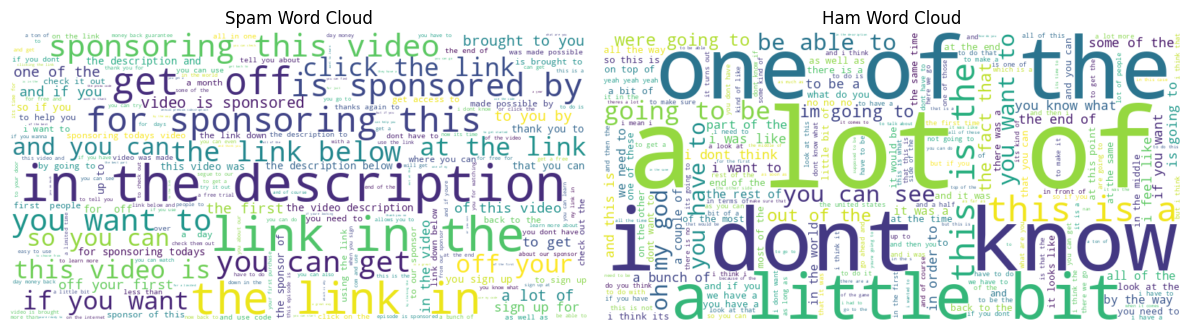

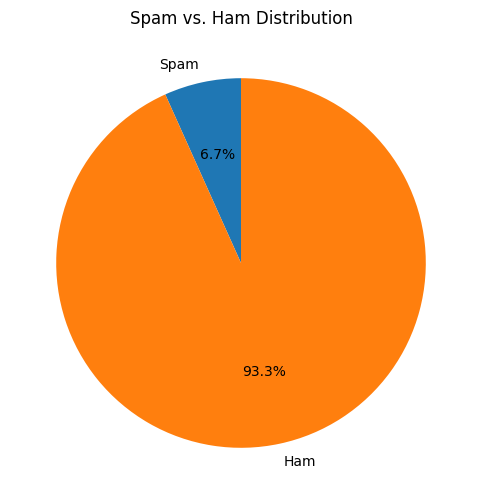

/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:297: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([word[0] for word in top_spam_words], rotation=45)
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:307: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([word[0] for word in top_ham_words], rotation=45)


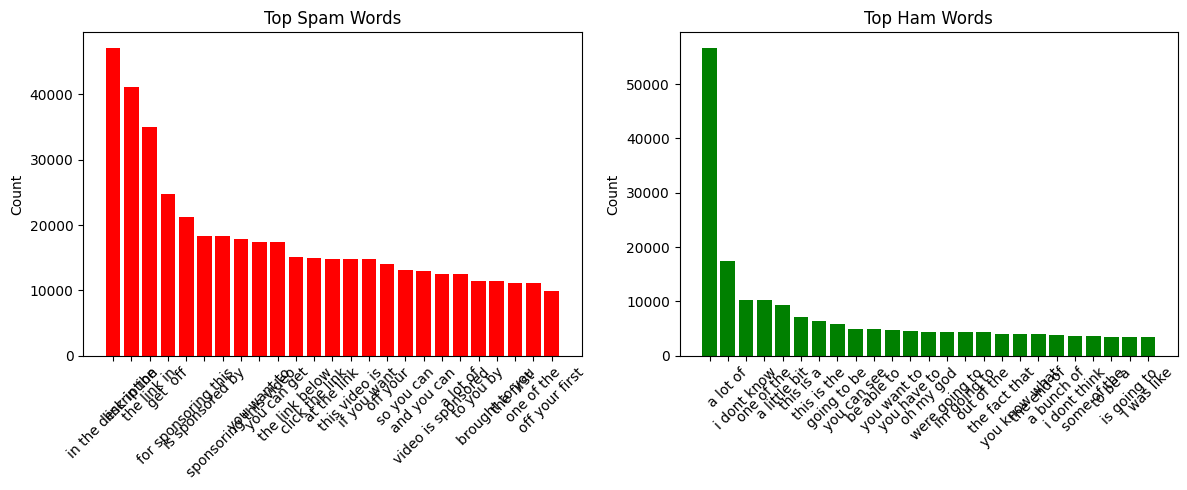

In [ ]:

visualize_words(model)
visualize_data_summary(model)
visualize_top_words(model, 25)


Chunking words...
Preprocessing text...


100%|██████████| 5271/5271 [00:00<00:00, 340933.54it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 5232/5232 [00:02<00:00, 1930.83it/s]


Spam words (0.5 threshold):
Spam: 0:00:00.420000      Word: this video is       Ad: True                Average spam: 0.9918430131882476
Spam: 0:00:00.780000      Word: video is sponsored  Ad: True                Average spam: 0.9240860068546168
Spam: 0:00:01.140000      Word: is sponsored by     Ad: True                Average spam: 0.6267425512232964
Spam: 0:32:45.880000      Word: of your family      Ad: True                Average spam: 0.5119797137934928
Spam: 0:32:46.120000      Word: your family or      Ad: True                Average spam: 0.5369748205980169
Spam: 0:32:46.350000      Word: family or friend    Ad: True                Average spam: 0.5619747631130342
Spam: 0:32:46.580000      Word: or friend group     Ad: True                Average spam: 0.5869747628491633
Spam: 0:32:46.820000      Word: friend group well   Ad: True                Average spam: 0.6119747625852924
Spam: 0:32:47.050000      Word: group well anydesk  Ad: True                Average spam: 0.63697476

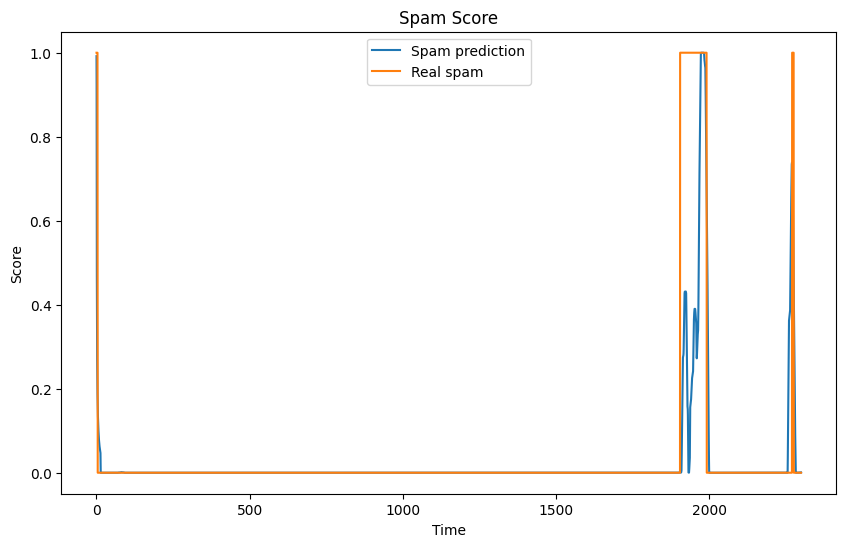

Chunking words...
Preprocessing text...


100%|██████████| 3418/3418 [00:00<00:00, 571206.11it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 3379/3379 [00:01<00:00, 1933.19it/s]


Spam words (0.5 threshold):
Spam: 0:00:00.130000      Word: this video was      Ad: True                Average spam: 0.9998533933107202
Spam: 0:00:00.500000      Word: video was sponsored Ad: True                Average spam: 0.8822929031682714
Spam: 0:00:00.870000      Word: was sponsored by    Ad: True                Average spam: 0.5967901105643602
Spam: 0:17:01.480000      Word: connected and well  Ad: False               Average spam: 0.5044792815904311
Spam: 0:17:02.030000      Word: and well wonder     Ad: False               Average spam: 0.5294792815904256
Spam: 0:17:02.350000      Word: well wonder why     Ad: False               Average spam: 0.554479281590411
Spam: 0:17:02.680000      Word: wonder why we       Ad: False               Average spam: 0.5794792815904006
Spam: 0:17:03             Word: why we didnt        Ad: False               Average spam: 0.604479281590398
Spam: 0:17:03.320000      Word: we didnt see        Ad: False               Average spam: 0.6294792815

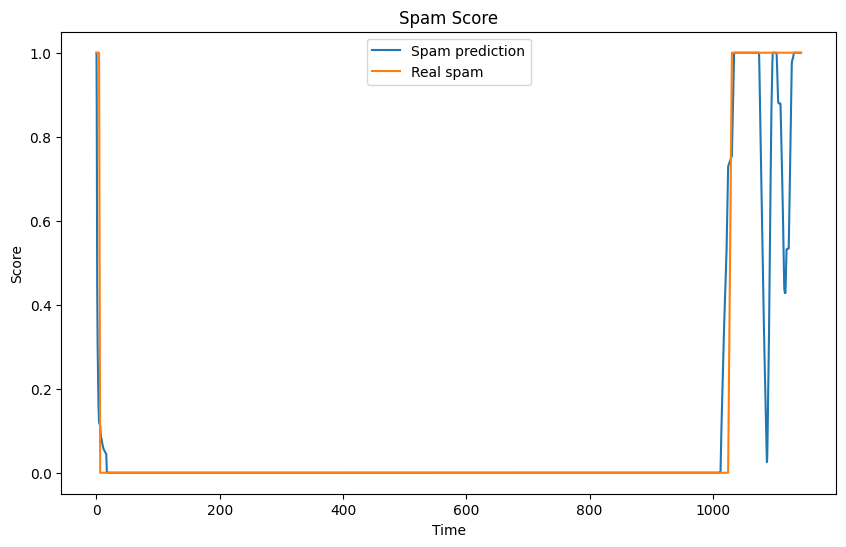

Chunking words...
Preprocessing text...


100%|██████████| 2018/2018 [00:00<00:00, 605313.99it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 1979/1979 [00:01<00:00, 1970.05it/s]


Spam words (0.5 threshold):
Spam: 0:04:57.110000      Word: this video is       Ad: False               Average spam: 0.5082775410662721
Spam: 0:04:57.320000      Word: video is one        Ad: False               Average spam: 0.5117548265523407
Spam: 0:04:57.540000      Word: is one of           Ad: False               Average spam: 0.5132743636683136
Spam: 0:04:57.890000      Word: one of acoustics    Ad: False               Average spam: 0.5138176184961866
Spam: 0:04:58.230000      Word: of acoustics this   Ad: False               Average spam: 0.5142563418931422
Spam: 0:04:58.580000      Word: acoustics this guy  Ad: False               Average spam: 0.5143404219286093
Spam: 0:04:58.920000      Word: this guy proposes   Ad: False               Average spam: 0.5144245401917305
Spam: 0:04:59.130000      Word: guy proposes using  Ad: False               Average spam: 0.5144358853209271
Spam: 0:04:59.350000      Word: proposes using it   Ad: False               Average spam: 0.51443767

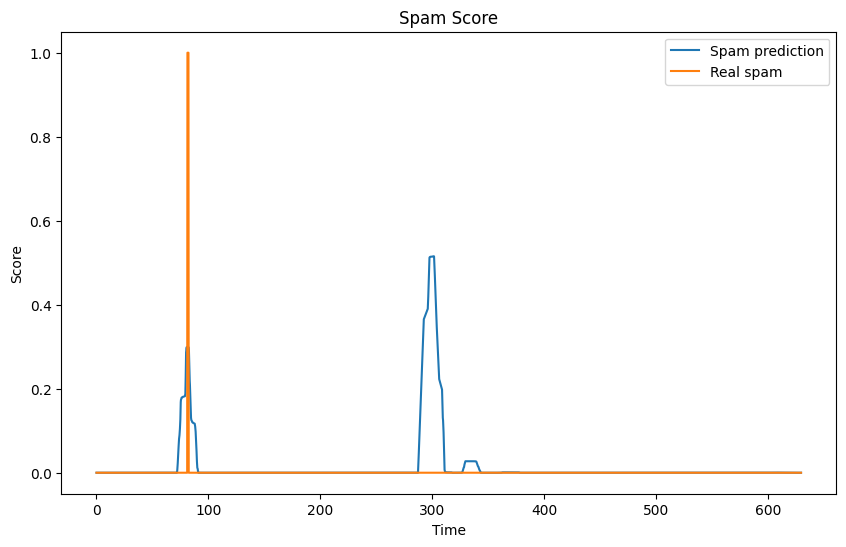

Chunking words...
Preprocessing text...


100%|██████████| 2885/2885 [00:00<00:00, 354959.43it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 2846/2846 [00:01<00:00, 1899.63it/s]


Spam words (0.5 threshold):
Spam: 0:09:49.910000      Word: when you close      Ad: True                Average spam: 0.5065274416228714
Spam: 0:09:50.180000      Word: you close it        Ad: True                Average spam: 0.5315242956410662
Spam: 0:09:50.450000      Word: close it down       Ad: True                Average spam: 0.5565200130340655
Spam: 0:09:50.720000      Word: it down the         Ad: True                Average spam: 0.5815186332612392
Spam: 0:09:50.990000      Word: down the flip       Ad: True                Average spam: 0.6065186069577633
Spam: 0:09:51.290000      Word: the flip is         Ad: True                Average spam: 0.6315185801295244
Spam: 0:09:51.570000      Word: flip is the         Ad: True                Average spam: 0.6565185717175614
Spam: 0:09:51.850000      Word: is the most         Ad: True                Average spam: 0.6815185634093395
Spam: 0:09:52.130000      Word: the most innovative Ad: True                Average spam: 0.70651855

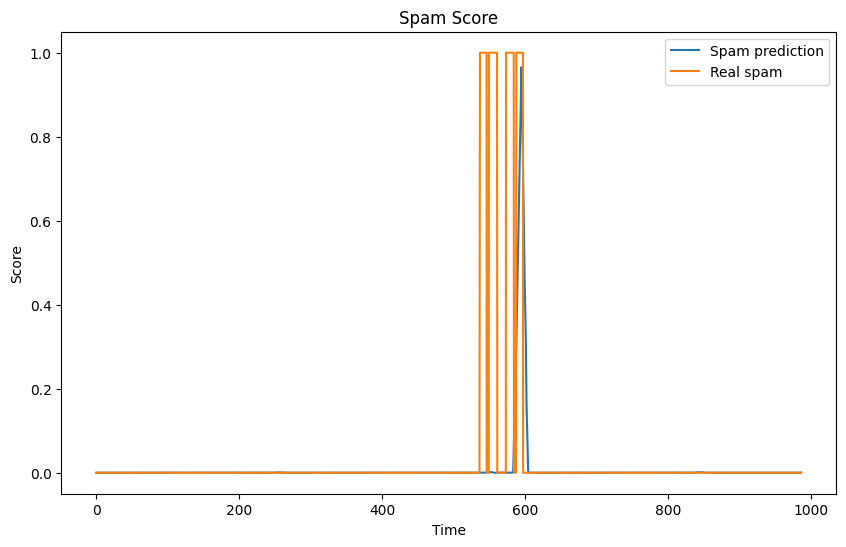

Chunking words...
Preprocessing text...


100%|██████████| 2898/2898 [00:00<00:00, 547921.61it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 2859/2859 [00:01<00:00, 1982.49it/s]


Spam words (0.5 threshold):
Spam: 0:00:00.080000      Word: this video is       Ad: True                Average spam: 0.999999448439201
Spam: 0:00:00.480000      Word: video is sponsored  Ad: True                Average spam: 0.999988066960027
Spam: 0:00:00.880000      Word: is sponsored by     Ad: True                Average spam: 0.997560863516704
Spam: 0:00:01.280000      Word: sponsored by predatorAd: True                Average spam: 0.8467106528904152
Spam: 0:00:01.680000      Word: by predator providerAd: True                Average spam: 0.6792934925740666
Spam: 0:00:02.080000      Word: predator provider ofAd: True                Average spam: 0.5661103487744709
Spam: 0:00:31.490000      Word: guide on the        Ad: False               Average spam: 0.5067606011054049
Spam: 0:00:31.810000      Word: on the topic        Ad: False               Average spam: 0.5317606008585603
Spam: 0:00:32.120000      Word: the topic on        Ad: False               Average spam: 0.5567605992

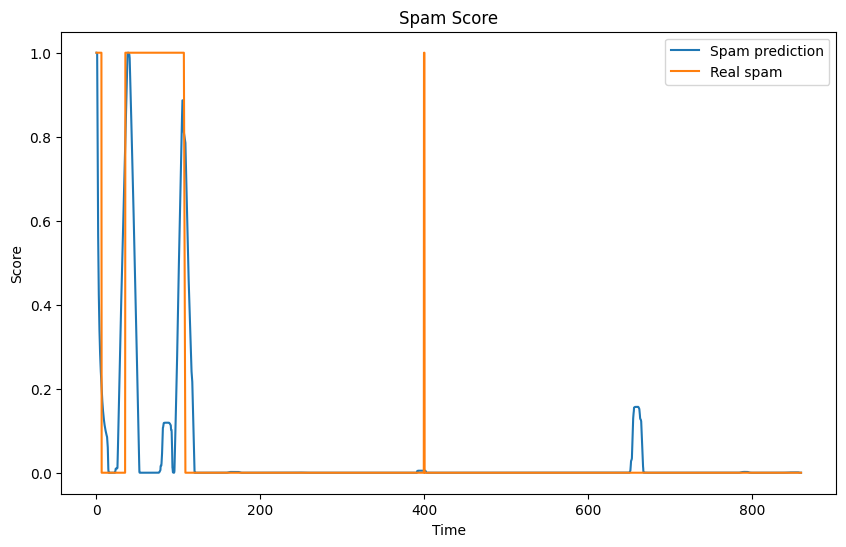

Chunking words...
Preprocessing text...


100%|██████████| 1947/1947 [00:00<00:00, 574041.18it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 1908/1908 [00:00<00:00, 1990.13it/s]


Spam words (0.5 threshold):
Spam: 0:00:26.140000      Word: lab and if          Ad: True                Average spam: 0.506161239732741
Spam: 0:00:26.400000      Word: and if not          Ad: True                Average spam: 0.5311612397324199
Spam: 0:00:26.880000      Word: if not you          Ad: True                Average spam: 0.5561612397322945
Spam: 0:00:27.360000      Word: not you whos        Ad: True                Average spam: 0.5811612397305546
Spam: 0:00:27.840000      Word: you whos gonna      Ad: True                Average spam: 0.6061612397304332
Spam: 0:00:28.320000      Word: whos gonna be       Ad: True                Average spam: 0.6311612397303117
Spam: 0:00:28.640000      Word: gonna be around     Ad: True                Average spam: 0.6561612397303054
Spam: 0:00:28.960000      Word: be around to        Ad: True                Average spam: 0.681161239730302
Spam: 0:00:29.270000      Word: around to tell      Ad: True                Average spam: 0.7061612397

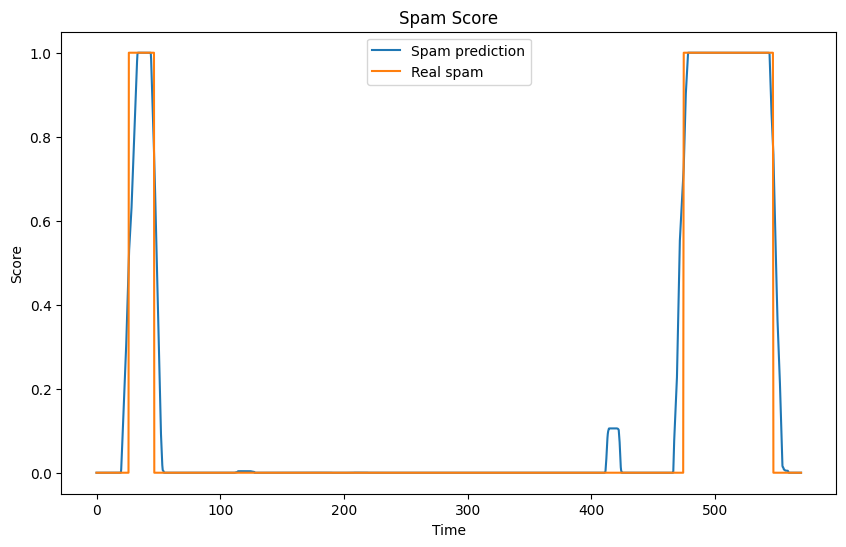

Chunking words...
Preprocessing text...


100%|██████████| 3737/3737 [00:00<00:00, 544448.02it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 3698/3698 [00:01<00:00, 1979.34it/s]


Spam words (0.5 threshold):
Spam: 0:00:44.880000      Word: this video is       Ad: True                Average spam: 0.5028975547356851
Spam: 0:00:45.260000      Word: video is sponsored  Ad: True                Average spam: 0.5031956803880282
Spam: 0:00:45.630000      Word: is sponsored by     Ad: True                Average spam: 0.5031972956865505
Spam: 0:00:46.010000      Word: sponsored by onshapeAd: True                Average spam: 0.5030968832130693
Spam: 0:22:08.690000      Word: begins only when    Ad: False               Average spam: 0.5196438559708769
Spam: 0:22:09             Word: only when you       Ad: False               Average spam: 0.5445454574879459
Spam: 0:22:09.340000      Word: when you leave      Ad: False               Average spam: 0.5692543873408977
Spam: 0:22:09.680000      Word: you leave the       Ad: False               Average spam: 0.5940367782106108
Spam: 0:22:10.030000      Word: leave the start     Ad: False               Average spam: 0.61872844

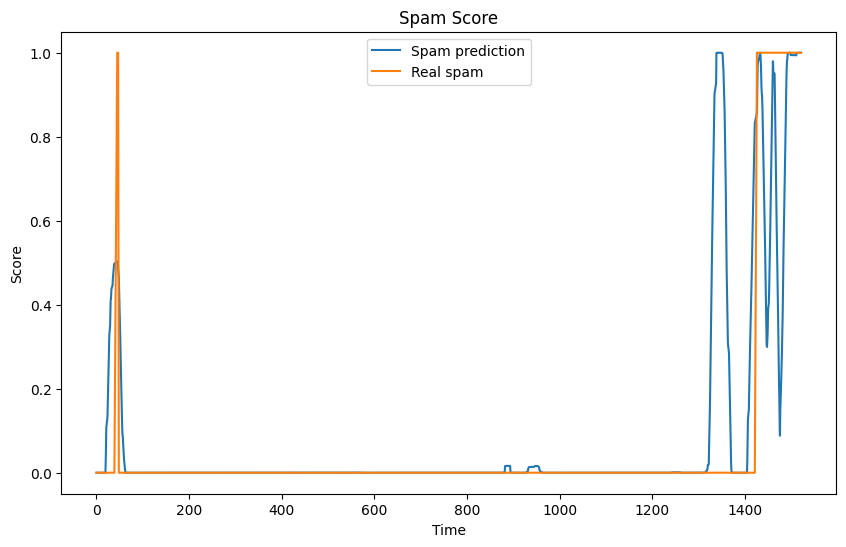

Chunking words...
Preprocessing text...


100%|██████████| 4548/4548 [00:00<00:00, 602898.06it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 4509/4509 [00:02<00:00, 1932.85it/s]


Spam words (0.5 threshold):
Spam: 0:00:00.120000      Word: this video is       Ad: True                Average spam: 0.9379131034448895
Spam: 0:00:00.500000      Word: video is sponsored  Ad: True                Average spam: 0.8138399804980289
Spam: 0:00:00.880000      Word: is sponsored by     Ad: True                Average spam: 0.5429894357600479
Spam: 0:05:01             Word: working on the      Ad: True                Average spam: 0.512571159546037
Spam: 0:05:01.250000      Word: on the legs         Ad: True                Average spam: 0.5316181769559722
Spam: 0:05:01.510000      Word: the legs are        Ad: True                Average spam: 0.5389073567441465
Spam: 0:05:01.760000      Word: legs are built      Ad: True                Average spam: 0.558288044287438
Spam: 0:05:02.010000      Word: are built with      Ad: True                Average spam: 0.5779621185188415
Spam: 0:05:02.270000      Word: built with          Ad: True                Average spam: 0.5912625152

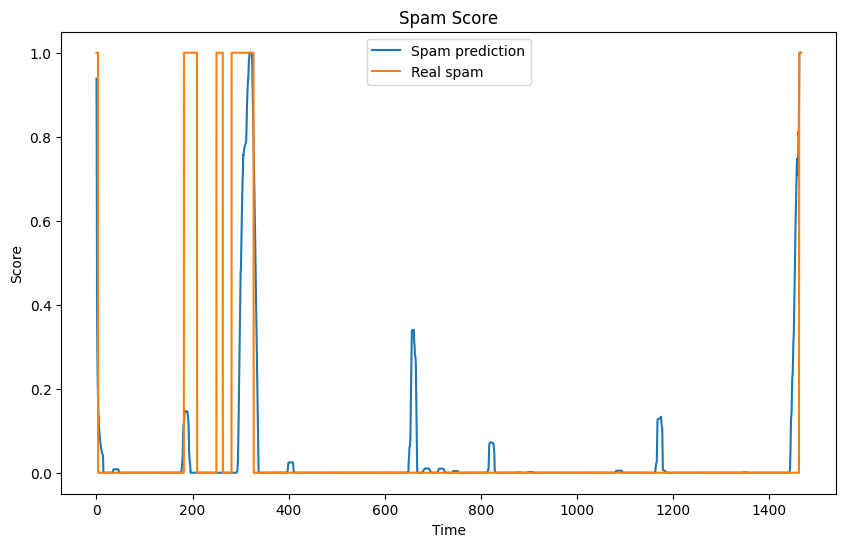

Chunking words...
Preprocessing text...


100%|██████████| 2758/2758 [00:00<00:00, 623269.96it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 2719/2719 [00:01<00:00, 1915.59it/s]


Spam words (0.5 threshold):
Spam: 0:09:27.770000      Word: league its a        Ad: True                Average spam: 0.5061667593749624
Spam: 0:09:27.930000      Word: its a gaming        Ad: True                Average spam: 0.5311631803561518
Spam: 0:09:28.150000      Word: a gaming league     Ad: True                Average spam: 0.556152980662788
Spam: 0:09:28.360000      Word: gaming league broughtAd: True                Average spam: 0.5811427809130151
Spam: 0:09:28.570000      Word: league brought to   Ad: True                Average spam: 0.6061325801619821
Spam: 0:09:28.780000      Word: brought to you      Ad: True                Average spam: 0.631105358763252
Spam: 0:09:28.990000      Word: to you by           Ad: True                Average spam: 0.6526246426031648
Spam: 0:09:29.200000      Word: you by efuse        Ad: True                Average spam: 0.6533434032655099
Spam: 0:09:29.410000      Word: by efuse and        Ad: True                Average spam: 0.653305415

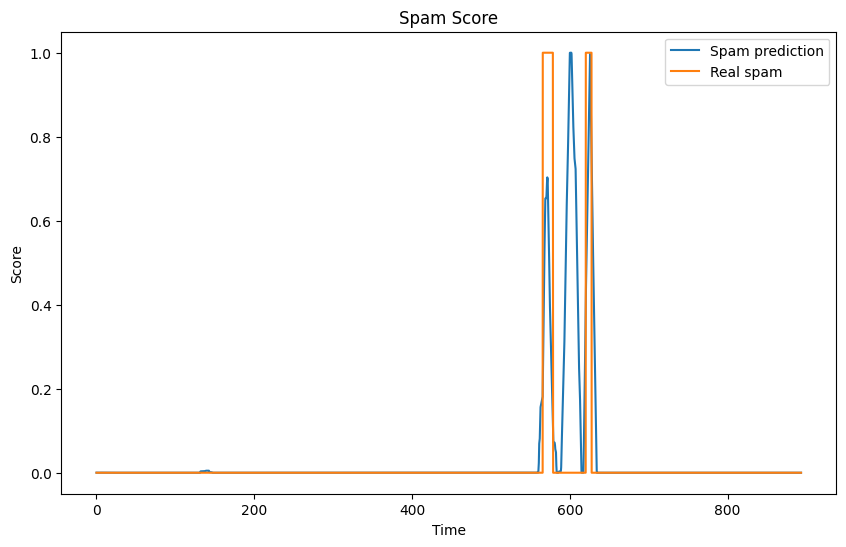

Chunking words...
Preprocessing text...


100%|██████████| 6386/6386 [00:00<00:00, 555160.43it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 6347/6347 [00:03<00:00, 1720.89it/s]


Spam words (0.5 threshold):
Spam: 0:00:00.100000      Word: this video was      Ad: True                Average spam: 1.0
Spam: 0:00:00.400000      Word: video was made      Ad: True                Average spam: 1.0
Spam: 0:00:00.700000      Word: was made possible   Ad: True                Average spam: 1.0
Spam: 0:00:01             Word: made possible by    Ad: True                Average spam: 1.0
Spam: 0:00:01.300000      Word: possible by honey   Ad: True                Average spam: 1.0
Spam: 0:00:01.600000      Word: by honey click      Ad: True                Average spam: 1.0
Spam: 0:00:01.900000      Word: honey click the     Ad: True                Average spam: 1.0
Spam: 0:00:02.200000      Word: click the link      Ad: True                Average spam: 1.0
Spam: 0:00:02.440000      Word: the link below      Ad: True                Average spam: 1.0
Spam: 0:00:02.680000      Word: link below to       Ad: True                Average spam: 1.0
Spam: 0:00:02.920000      Word: 

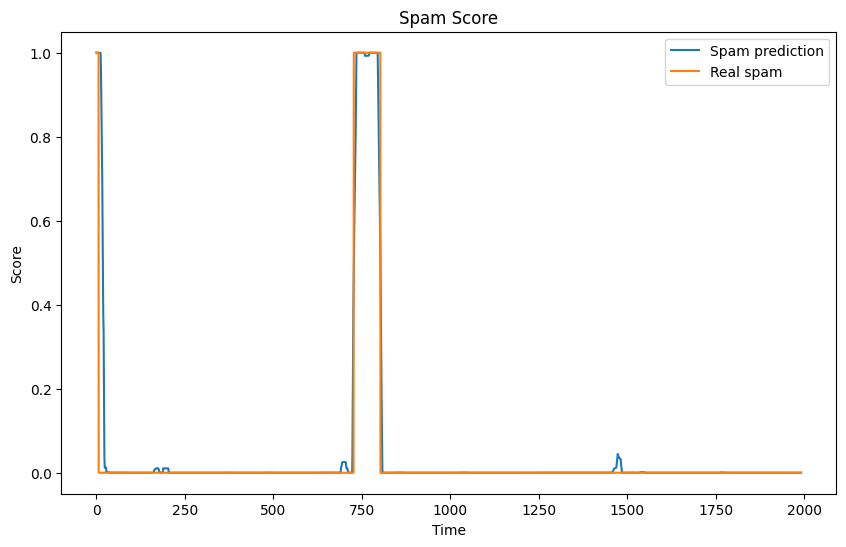

Chunking words...
Preprocessing text...


100%|██████████| 3292/3292 [00:00<00:00, 517411.71it/s]
/home/arunang/dev/ntnu/ml/ad-detection/bayes.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text["word"] = clean_text["word"].progress_apply(preprocessor)
100%|██████████| 3253/3253 [00:01<00:00, 1680.01it/s]


Spam words (0.5 threshold):
Spam: 0:00:00             Word: part of this        Ad: False               Average spam: 0.9999999995206265
Spam: 0:00:00.330000      Word: of this video       Ad: True                Average spam: 0.9999999994479651
Spam: 0:00:00.660000      Word: this video was      Ad: True                Average spam: 0.999999996719528
Spam: 0:00:00.990000      Word: video was sponsored Ad: True                Average spam: 0.9999999083519945
Spam: 0:00:01.320000      Word: was sponsored by    Ad: True                Average spam: 0.9999835674710192
Spam: 0:00:01.650000      Word: sponsored by google Ad: True                Average spam: 0.9983822047835108
Spam: 0:00:01.980000      Word: by google domains   Ad: True                Average spam: 0.8953033809851692
Spam: 0:00:02.310000      Word: google domains this Ad: True                Average spam: 0.7863330841133981
Spam: 0:00:02.640000      Word: domains this is     Ad: True                Average spam: 0.701578408

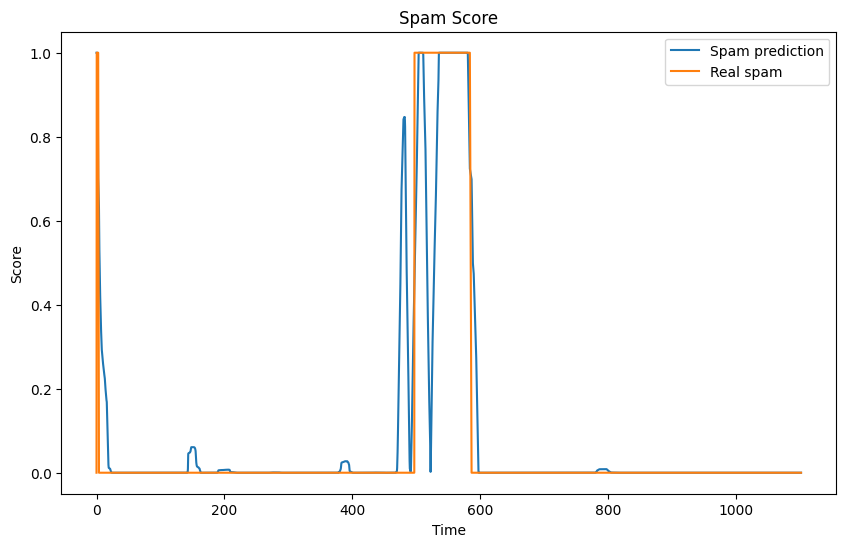

In [ ]:
testing_data = files.load_data(FileType.TESTING)
for frame in testing_data:
    clean_data = model.preprocess_words(frame, chunk_words=word_chunking, preprocessors=pre_processors)
    classification = model.classify_text(testing_data=clean_data, window_size=40, alpha=1)
    model.evaluate_classification(classification)